In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_sample_densities(adata):
    # Convert adata.X to a DataFrame for easier plotting
    df = pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names)
    
    plt.figure(figsize=(10, 6))
    for sample in df.index:
        sns.kdeplot(df.loc[sample], label=sample, linewidth=1)
    
    plt.title("Density Plot for All Samples")
    plt.xlabel("Expression Values")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

In [61]:
import anndata as ad

In [62]:
adata = ad.read_h5ad("../data/testdata/test4_qcplots/test4_input/adata_log2_cont_filter.h5ad")

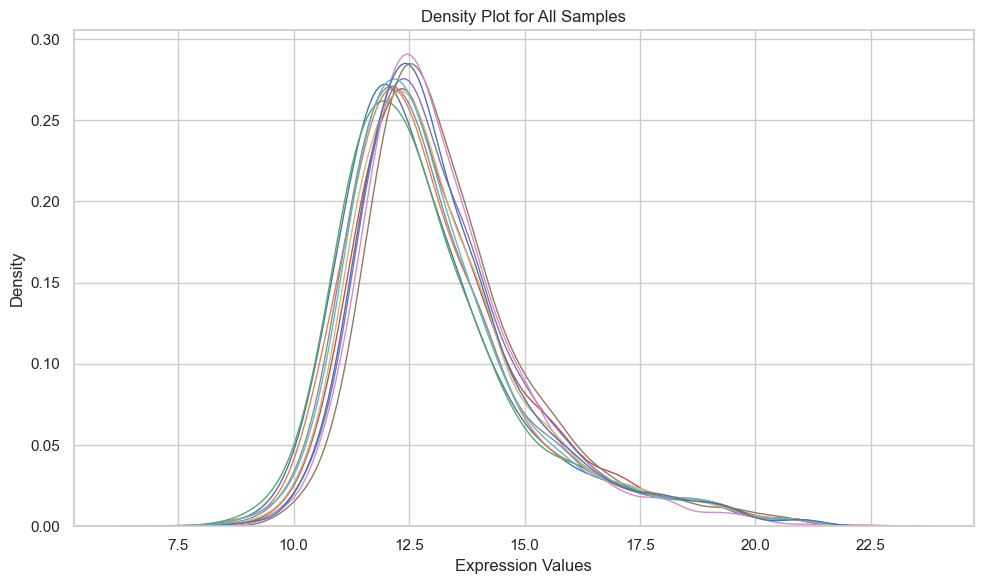

In [65]:
plot_sample_densities(adata)

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get expression values (assuming they are stored in `adata.X`)
# Convert them to a DataFrame for easier handling
expression_df = pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names)

# Rank the expression values for each row
ranked_df = expression_df.rank(axis=1, method='average')

# Convert expression values and ranks to long format for Seaborn plotting
expression_long = expression_df.melt(ignore_index=False, var_name="Protein", value_name="Expression")
ranked_long = ranked_df.melt(ignore_index=False, var_name="Protein", value_name="Rank")

# Merge ranks with expression values
plot_data = pd.merge(expression_long.reset_index(), ranked_long.reset_index(), on=["index", "Protein"])
plot_data.rename(columns={"index": "Sample"}, inplace=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x="Rank", y="Expression", hue="Sample", marker="o", palette="viridis", legend=False)
plt.title("Rank Plot of Protein Expression")
plt.xlabel("Rank of Protein Expression")
plt.ylabel("Expression Value")
plt.show()

KeyError: 'index'